In [5]:
import numpy as np
import pandas as pd

# Data penyebaran TB berdasarkan jenis TB dan usia
data = {
    'Kecamatan': ['Karang Baru', 'Tamiang Hulu', 'Rantau', 'Seruway', 'Banda Mulia', 'Bendahara', 'Manyak Payed', 'Tenggulun', 'Kejuruan Muda', 'Sekerak', 'Bandar Pusaka', 'Kuala Simpang', 'Kota Kualasimpang'],
    'TBC_Paru': [15, 10, 20, 12, 8, 14, 11, 9, 13, 7, 10, 18, 16],
    'TBC_Ekstraparu': [3, 2, 4, 3, 2, 3, 2, 2, 3, 2, 2, 4, 3],
    'TBC_Milier': [2, 1, 3, 2, 1, 2, 1, 1, 2, 1, 1, 3, 2],
    'TBC_Meningitis': [1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2],
    'TBC_Kelenjar': [4, 3, 5, 4, 2, 4, 3, 3, 4, 2, 3, 5, 4],
    'TBC_Usus': [2, 1, 3, 2, 1, 2, 1, 1, 2, 1, 1, 3, 2],
    'TBC_Tulang': [1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1],
    'TBC_Kulit': [0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1],
    'Jumlah': [28, 20, 40, 27, 16, 29, 20, 18, 28, 15, 19, 38, 31]
}

# Convert data to DataFrame
df = pd.DataFrame(data)
print("Data telah disiapkan:")
df


Data telah disiapkan:


,Kecamatan,TBC_Paru,TBC_Ekstraparu,TBC_Milier,TBC_Meningitis,TBC_Kelenjar,TBC_Usus,TBC_Tulang,TBC_Kulit,Jumlah
0,Karang Baru,15,3,2,1,4,2,1,0,28
1,Tamiang Hulu,10,2,1,1,3,1,1,1,20
2,Rantau,20,4,3,2,5,3,2,1,40
3,Seruway,12,3,2,2,4,2,1,1,27
4,Banda Mulia,8,2,1,1,2,1,1,0,16
5,Bendahara,14,3,2,2,4,2,1,1,29
6,Manyak Payed,11,2,1,1,3,1,1,0,20
7,Tenggulun,9,2,1,1,3,1,1,0,18
8,Kejuruan Muda,13,3,2,2,4,2,1,1,28
9,Sekerak,7,2,1,1,2,1,1,0,15


In [6]:
# Extract feature data for clustering
X = df[['TBC_Paru', 'TBC_Ekstraparu', 'TBC_Milier', 'TBC_Meningitis', 'TBC_Kelenjar', 'TBC_Usus', 'TBC_Tulang', 'TBC_Kulit']]
print("Fitur yang diekstraksi:")
X


Fitur yang diekstraksi:


,TBC_Paru,TBC_Ekstraparu,TBC_Milier,TBC_Meningitis,TBC_Kelenjar,TBC_Usus,TBC_Tulang,TBC_Kulit
0,15,3,2,1,4,2,1,0
1,10,2,1,1,3,1,1,1
2,20,4,3,2,5,3,2,1
3,12,3,2,2,4,2,1,1
4,8,2,1,1,2,1,1,0
5,14,3,2,2,4,2,1,1
6,11,2,1,1,3,1,1,0
7,9,2,1,1,3,1,1,0
8,13,3,2,2,4,2,1,1
9,7,2,1,1,2,1,1,0


In [7]:
from sklearn_extra.cluster import KMedoids

class KMedoidsLogger(KMedoids):
    def fit(self, X, y=None):
        # Overriding the fit method to add logging
        X = np.asarray(X)
        n_samples = X.shape[0]
        medoid_indices = self._initialize_medoids(X)
        self.medoid_indices_ = medoid_indices
        self.labels_ = self._assign_labels(X, medoid_indices)
        
        iter_no = 0
        while True:
            iter_no += 1
            print(f"Iteration {iter_no}: Medoid indices - {medoid_indices}")
            new_medoids = self._update_medoids(X, self.labels_)
            new_labels = self._assign_labels(X, new_medoids)

            if np.all(new_medoids == medoid_indices):
                break

            medoid_indices = new_medoids
            self.labels_ = new_labels

        self.medoid_indices_ = medoid_indices
        self.labels_ = new_labels
        self.cluster_centers_ = X[medoid_indices]
        print(f"Final Medoids: {medoid_indices}")
        return self

    def _initialize_medoids(self, X):
        np.random.seed(self.random_state)
        medoid_indices = np.random.choice(len(X), self.n_clusters, replace=False)
        return medoid_indices

    def _assign_labels(self, X, medoid_indices):
        distances = np.array([np.linalg.norm(X - X[medoid_idx], axis=1) for medoid_idx in medoid_indices])
        return np.argmin(distances, axis=0)

    def _update_medoids(self, X, labels):
        new_medoids = np.zeros(self.n_clusters, dtype=int)
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) == 0:
                continue
            medoid_idx = np.argmin(np.sum(np.linalg.norm(cluster_points[:, np.newaxis] - cluster_points, axis=2), axis=1))
            new_medoids[i] = np.where(labels == i)[0][medoid_idx]
        return new_medoids


In [8]:
# Define number of clusters
n_clusters = 4

# Apply KMedoids clustering with logging
kmedoids_logger = KMedoidsLogger(n_clusters=n_clusters, random_state=0)
kmedoids_logger.fit(X)

# Add cluster labels to DataFrame
df['Cluster'] = kmedoids_logger.labels_

# Map cluster numbers to cluster names
cluster_mapping = {0: 'Aman', 1: 'Waspada', 2: 'Siaga', 3: 'Awas (Bahaya)'}
df['Cluster_Name'] = df['Cluster'].map(cluster_mapping)

print("Data dengan label cluster:")
df[['Kecamatan', 'Cluster_Name']]


Iteration 1: Medoid indices - [ 6 11  4 10]
Iteration 2: Medoid indices - [ 8 11  4 10]
Iteration 3: Medoid indices - [ 5  2  4 10]
Final Medoids: [ 5  2  4 10]
Data dengan label cluster:


,Kecamatan,Cluster_Name
0,Karang Baru,Aman
1,Tamiang Hulu,Awas (Bahaya)
2,Rantau,Waspada
3,Seruway,Aman
4,Banda Mulia,Siaga
5,Bendahara,Aman
6,Manyak Payed,Awas (Bahaya)
7,Tenggulun,Awas (Bahaya)
8,Kejuruan Muda,Aman
9,Sekerak,Siaga


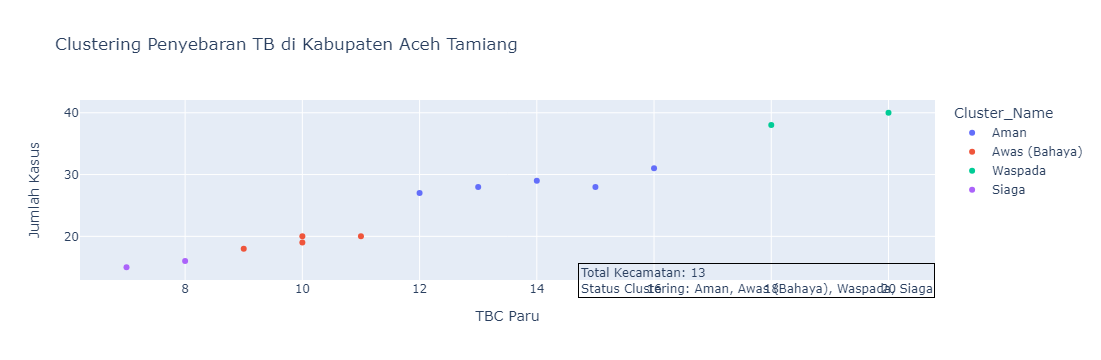

In [9]:
import plotly.express as px
import plotly.graph_objects as go

# Plot the clustering result
fig = px.scatter(
    df, x='TBC_Paru', y='Jumlah', color='Cluster_Name',
    hover_data={'Kecamatan': True, 'Cluster_Name': True, 'TBC_Paru': True, 'Jumlah': True},
    title='Clustering Penyebaran TB di Kabupaten Aceh Tamiang',
    labels={'TBC_Paru': 'TBC Paru', 'Jumlah': 'Jumlah Kasus'}
)

# Adding total counts and cluster status to the plot
total_kecamatan = df.shape[0]
fig.update_layout(
    annotations=[
        go.layout.Annotation(
            text=f"Total Kecamatan: {total_kecamatan}<br>Status Clustering: {', '.join(df['Cluster_Name'].unique())}",
            align='left',
            showarrow=False,
            xref='paper',
            yref='paper',
            x=1,
            y=-0.1,
            bordercolor='black',
            borderwidth=1
        )
    ]
)

# Show the plot
fig.show()


In [10]:
# Add geographical coordinates for each Kecamatan
coordinates = {
    'Karang Baru': [4.1754, 98.0093],
    'Tamiang Hulu': [4.2534, 97.8358],
    'Rantau': [4.1422, 98.0502],
    'Seruway': [3.9942, 98.0947],
    'Banda Mulia': [4.0982, 98.0566],
    'Bendahara': [4.2112, 98.0194],
    'Manyak Payed': [4.2446, 98.1084],
    'Tenggulun': [4.4205, 97.9111],
    'Kejuruan Muda': [4.1006, 98.0117],
    'Sekerak': [4.2843, 97.9771],
    'Bandar Pusaka': [4.3958, 97.9994],
    'Kuala Simpang': [4.1194, 97.9808],
    'Kota Kualasimpang': [4.1228, 97.9811]
}

df['Latitude'] = df['Kecamatan'].map(lambda x: coordinates[x][0])
df['Longitude'] = df['Kecamatan'].map(lambda x: coordinates[x][1])

print("Data dengan koordinat geografis:")
df


Data dengan koordinat geografis:


,Kecamatan,TBC_Paru,TBC_Ekstraparu,TBC_Milier,TBC_Meningitis,TBC_Kelenjar,TBC_Usus,TBC_Tulang,TBC_Kulit,Jumlah,Cluster,Cluster_Name,Latitude,Longitude
0,Karang Baru,15,3,2,1,4,2,1,0,28,0,Aman,4.1754,98.0093
1,Tamiang Hulu,10,2,1,1,3,1,1,1,20,3,Awas (Bahaya),4.2534,97.8358
2,Rantau,20,4,3,2,5,3,2,1,40,1,Waspada,4.1422,98.0502
3,Seruway,12,3,2,2,4,2,1,1,27,0,Aman,3.9942,98.0947
4,Banda Mulia,8,2,1,1,2,1,1,0,16,2,Siaga,4.0982,98.0566
5,Bendahara,14,3,2,2,4,2,1,1,29,0,Aman,4.2112,98.0194
6,Manyak Payed,11,2,1,1,3,1,1,0,20,3,Awas (Bahaya),4.2446,98.1084
7,Tenggulun,9,2,1,1,3,1,1,0,18,3,Awas (Bahaya),4.4205,97.9111
8,Kejuruan Muda,13,3,2,2,4,2,1,1,28,0,Aman,4.1006,98.0117
9,Sekerak,7,2,1,1,2,1,1,0,15,2,Siaga,4.2843,97.9771


In [11]:
import folium

# Create a map centered around Aceh Tamiang
map_center = [4.1488, 98.0103]
m = folium.Map(location=map_center, zoom_start=10)

# Define colors for clusters
cluster_colors = {
    'Aman': 'green',
    'Waspada': 'yellow',
    'Siaga': 'orange',
    'Awas (Bahaya)': 'red'
}

# Add points to the map
for i, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=10,
        popup=f"Kecamatan: {row['Kecamatan']}<br>Status: {row['Cluster_Name']}",
        color=cluster_colors[row['Cluster_Name']],
        fill=True,
        fill_color=cluster_colors[row['Cluster_Name']]
    ).add_to(m)

# Display the map
m.save('map.html')
m
